<a href="https://colab.research.google.com/github/worawit-saetan/Kaggle-Dataset---Classify-Cats-and-Dogs/blob/main/Kaggle_Dataset_Classify_Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Dataset - Classify Cats and Dogs (very small training dataset)
 We train with very small dataset 200 images for training set but get a great result (test accuracy of 87%)

We will create many CNN models to distinguish dogs from cats 

+ basic CNN

+ CNN with Data Augmentation and Dropout

+ Transfer Learning with VGG16 - feature extraction (freeze base model)

+ Transfer Learning with VGG16 - fine tuning (unfreeze few last layers of base model)

Split the folder into training/validation/test set with followings

train/cats 100 images

train/dogs 100 images

validation/cats 50 images

validation/dogs 50 images

test/cats 50 images

test/dogs 50 images

In [1]:
import os, shutil
original_dataset_dir = '/content/cats_and_dogs_very_small'

base_dir = '/content/cats_and_dogs_dataset'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [2]:
fnames = ['cat.{}.jpg'.format(i) for i in range(100)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(150, 200)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

In [3]:
fnames = ['dog.{}.jpg'.format(i) for i in range(100)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)
  
fnames = ['dog.{}.jpg'.format(i) for i in range(150, 200)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

check the folders

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 100
total training dog images: 100
total validation cat images: 50
total validation dog images: 50
total test cat images: 50
total test dog images: 50


Create basic CNN

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [7]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Flow from the directory into train and validation

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='binary')

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [9]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=20, #train_generator will fetch the data endlessly then we need to specity the step to break it (training size/batch_size)
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10 #validation_generator will fetch the data endlessly then we need to specity the step to break it (validation size/batch_size)
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
20/20 [==============================] - 13s 566ms/step - loss: 0.6963 - acc: 0.4650 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 2/20
20/20 [==============================] - 12s 589ms/step - loss: 0.6918 - acc: 0.5150 - val_loss: 0.6873 - val_acc: 0.5000
Epoch 3/20
20/20 [==============================] - 11s 553ms/step - loss: 0.6766 - acc: 0.5950 - val_loss: 0.6990 - val_acc: 0.5000
Epoch 4/20
20/20 [==============================] - 12s 613ms/step - loss: 0.6580 - acc: 0.6650 - val_loss: 0.6821 - val_acc: 0.5200
Epoch 5/20
20/20 [==============================] - 11s 558ms/step - loss: 0.6283 - acc: 0.6150 - val_loss: 0.6915 - val_acc: 0.5200
Epoch 6/20
20/20 [==============================] - 11s 559ms/step - loss: 0.6157 - acc: 0.7000 - val_loss: 0.6529 - val_acc: 0.6300
Epoch 7/20
20/20 [==============================] - 11s 555ms/step - loss: 0.6000 - acc: 0.6700 - val_loss: 0.6809 - val_acc: 0.5600
Epoch 8/20
20/20 [==============================] - 11s 575ms/step - 

End up with validation accuracy = 64 and training accuracy = 90 (overfitting)


Lets save the model and plot the graph of the accuracy and the loss

In [10]:
model.save('cats_and_dogs_small_basic_CNN.h5')

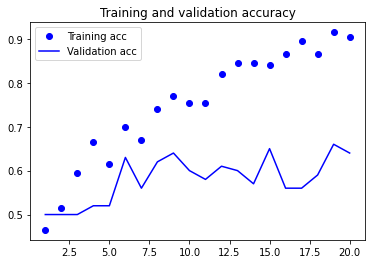

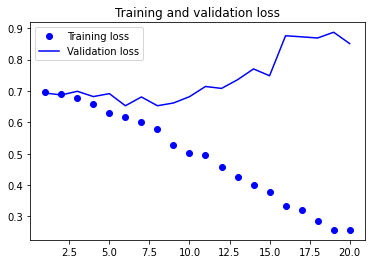

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Using Data Augmentation 

In [12]:
train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
  )
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary')

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [16]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [17]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch=10,
  epochs=100,
  validation_data=validation_generator,
  validation_steps=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
10/10 [==============================] - 13s 1s/step - loss: 0.7051 - acc: 0.4500 - val_loss: 0.6922 - val_acc: 0.4600
Epoch 2/100
10/10 [==============================] - 11s 1s/step - loss: 0.6916 - acc: 0.4750 - val_loss: 0.6897 - val_acc: 0.5400
Epoch 3/100
10/10 [==============================] - 11s 1s/step - loss: 0.7006 - acc: 0.4850 - val_loss: 0.6906 - val_acc: 0.5600
Epoch 4/100
10/10 [==============================] - 11s 1s/step - loss: 0.6947 - acc: 0.5100 - val_loss: 0.6883 - val_acc: 0.5000
Epoch 5/100
10/10 [==============================] - 11s 1s/step - loss: 0.6971 - acc: 0.5100 - val_loss: 0.6894 - val_acc: 0.5800
Epoch 6/100
10/10 [==============================] - 11s 1s/step - loss: 0.6868 - acc: 0.5300 - val_loss: 0.6915 - val_acc: 0.5000
Epoch 7/100
10/10 [==============================] - 11s 1s/step - loss: 0.6877 - acc: 0.5200 - val_loss: 0.6802 - val_acc: 0.5900
Epoch 8/100
10/10 [==============================] - 12s 1s/step - loss: 0.6849 - a

End up with validation accuracy = 73 (old acc = 64) and training accuracy = 80.5 (old acc = 90) , that's great 8 % improvement of validation accuracy 


Lets save the model and plot the graph of the accuracy and the loss

In [18]:
model.save('cats_and_dogs_small_CNN_with_Augmentation_and_Dropout.h5')

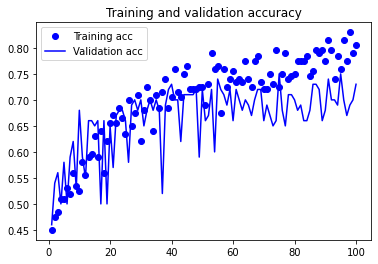

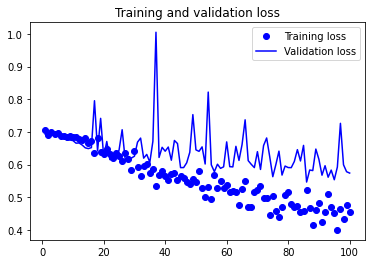

In [19]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

FEATURE EXTRACTION WITH DATA AUGMENTATION

download VGG16 model

In [20]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [21]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

Adding a densely connected classifier on top of the convolutional base

In [22]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


freeze a network by setting its trainable attribute to False

In [24]:
conv_base.trainable = False

In [25]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary')

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [26]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch=10,
  epochs=30,
  validation_data=validation_generator,
  validation_steps=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
10/10 [==============================] - 64s 7s/step - loss: 0.6961 - acc: 0.5450 - val_loss: 0.6304 - val_acc: 0.6500
Epoch 2/30
10/10 [==============================] - 61s 6s/step - loss: 0.6383 - acc: 0.6550 - val_loss: 0.5852 - val_acc: 0.7000
Epoch 3/30
10/10 [==============================] - 61s 6s/step - loss: 0.6316 - acc: 0.6450 - val_loss: 0.5484 - val_acc: 0.7600
Epoch 4/30
10/10 [==============================] - 61s 6s/step - loss: 0.6172 - acc: 0.6950 - val_loss: 0.5263 - val_acc: 0.7700
Epoch 5/30
10/10 [==============================] - 61s 6s/step - loss: 0.5829 - acc: 0.7100 - val_loss: 0.4906 - val_acc: 0.8200
Epoch 6/30
10/10 [==============================] - 61s 6s/step - loss: 0.5575 - acc: 0.7600 - val_loss: 0.4670 - val_acc: 0.8200
Epoch 7/30
10/10 [==============================] - 62s 6s/step - loss: 0.5298 - acc: 0.7800 - val_loss: 0.4571 - val_acc: 0.8100
Epoch 8/30
10/10 [==============================] - 61s 6s/step - loss: 0.5419 - acc: 0.77

End up with validation accuracy = 91 (old acc = 73) and training accuracy = 86.5 (old acc = 80) , that's amazing 18 % improvement of validation accuracy 


Lets save the model and plot the graph of the accuracy and the loss

In [28]:
model.save('cats_and_dogs_small_VGG16_feature_extraction.h5')

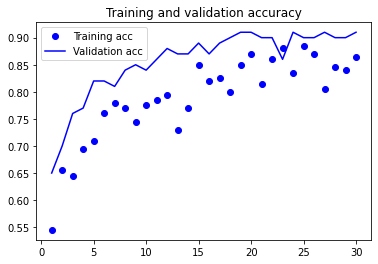

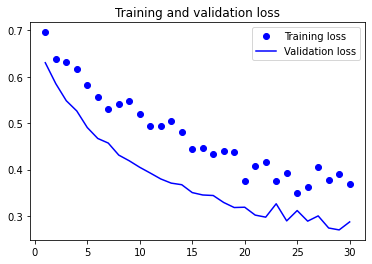

In [27]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Let's fine tune this model

1 Add your custom network on top of an already-trained base network.

2 Freeze the base network.

3 Train the part you added.

4 Unfreeze some layers in the base network.

5 Jointly train both these layers and the part you added.

We already completed the first three steps when doing feature extraction. Let’s proceed
with step 4

In [29]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

We’ll do this with the RMSProp optimizer, using a very low learning rate. The reason for using a low learning rate is that we want to limit the magnitude of the modifications we make to the representations of the three layers we fine-tuning. Updates that are too large may harm these representations.

In [30]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/30
10/10 [==============================] - 82s 8s/step - loss: 0.3938 - acc: 0.8200 - val_loss: 0.2522 - val_acc: 0.8800
Epoch 2/30
10/10 [==============================] - 82s 9s/step - loss: 0.3096 - acc: 0.8750 - val_loss: 0.2381 - val_acc: 0.9100
Epoch 3/30
10/10 [==============================] - 76s 8s/step - loss: 0.2960 - acc: 0.8800 - val_loss: 0.2286 - val_acc: 0.9000
Epoch 4/30
10/10 [==============================] - 72s 7s/step - loss: 0.2296 - acc: 0.9400 - val_loss: 0.2235 - val_acc: 0.8800
Epoch 5/30
10/10 [==============================] - 88s 9s/step - loss: 0.2789 - acc: 0.9050 - val_loss: 0.2208 - val_acc: 0.8800
Epoch 6/30
10/10 [==============================] - 70s 7s/step - loss: 0.2295 - acc: 0.9000 - val_loss: 0.2198 - val_acc: 0.9100
Epoch 7/30
10/10 [==============================] - 70s 7s/step - loss: 0.2698 - acc: 0.9050 - val_loss: 0.2049 - val_acc: 0.9000
Epoch 8/30
10/10 [==============================] - 69s 7s/step - loss: 0.2058 - acc: 0.92

End up with validation accuracy = 90 (old acc = 91) and training accuracy = 95.5 (old acc = 86.5) this is because we train with very small data. wewill see the validation accuracy at epoch 29 is 94.0


Lets save the model and plot the graph of the accuracy and the loss

In [35]:
model.save('cats_and_dogs_small_VGG16_fine_tuning.h5')

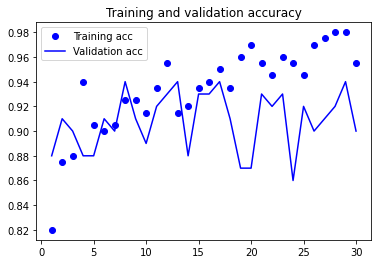

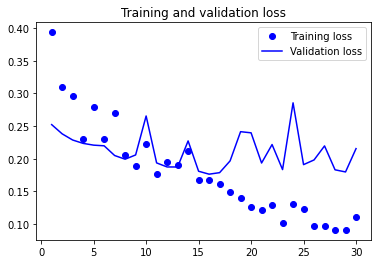

In [36]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

These curves look noisy. To make them more readable, we can smooth them by replacing every loss and accuracy with exponential moving averages of these quantities.

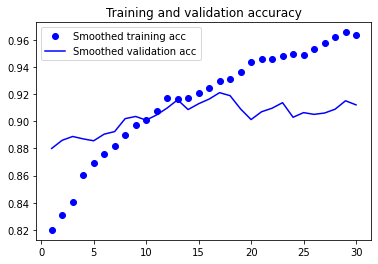

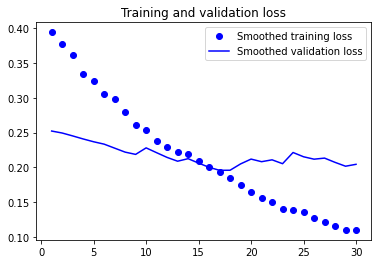

In [37]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points


plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

We can now evaluate this model on the test data

In [38]:
test_generator = test_datagen.flow_from_directory(
  test_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary')

Found 100 images belonging to 2 classes.


In [39]:
test_loss, test_acc = model.evaluate(test_generator, steps=5)
print('test acc:', test_acc)

5/5 [==============================] - 23s 4s/step - loss: 0.3814 - acc: 0.8700
test acc: 0.8700000047683716


Here we get a test accuracy of 87%. that is great.